<a href="https://colab.research.google.com/github/UnplugCharger/Week-9-IP/blob/Naive-Bayers/KNN_WEEK_9_INDEPENDENT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train=pd.read_csv('/content/drive/My Drive/Core Datasets/Week 9/train (5) (1).csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test=pd.read_csv('/content/drive/My Drive/Core Datasets/Week 9/test (1) (1).csv')

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

# EDA

In [9]:
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[0]
        info['data type'] = df.dtypes
        info['percent duplicated'] = df.duplicated().sum()*100/len(df)
        info['percent missing'] = df.isnull().sum()*100/len(df)
        return info.sort_values('data type')

In [10]:
sniff(train)

,sample,data type,percent duplicated,percent missing
PassengerId,1,int64,0.0,0.000000
Survived,0,int64,0.0,0.000000
Pclass,3,int64,0.0,0.000000
SibSp,1,int64,0.0,0.000000
Parch,0,int64,0.0,0.000000
Age,22,float64,0.0,19.865320
Fare,7.25,float64,0.0,0.000000
Name,"Braund, Mr. Owen Harris",object,0.0,0.000000
Sex,male,object,0.0,0.000000
Ticket,A/5 21171,object,0.0,0.000000


Initial look into our dataset shows that we do not have duplicated values 

There are 19.86% missing value in the age coumns . We will impute the missing 

The cabin column has 77.1% missing values ... this is more than enough and we will drop the columns

Embarked has 0.22 % missing values so we will impute the missing

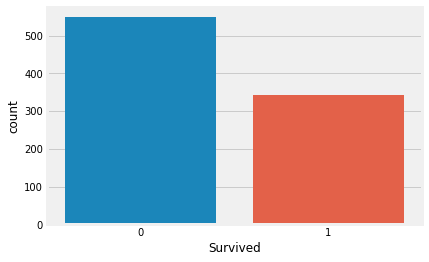

In [15]:
sns.countplot('Survived',data=train)
plt.show()

our target variable is the survived  column 

as we can see most people did not survive on this out of the out of the 891persons only 350 survived ... from this we can conclude that our data is slightly unbalanced and the best score metrix will be the f1 score

we will contiue with the exploration to discover more about our data

                Age
Survived           
0         30.028233
1         28.291433
               Fare
Survived           
0         22.117887
1         48.395409


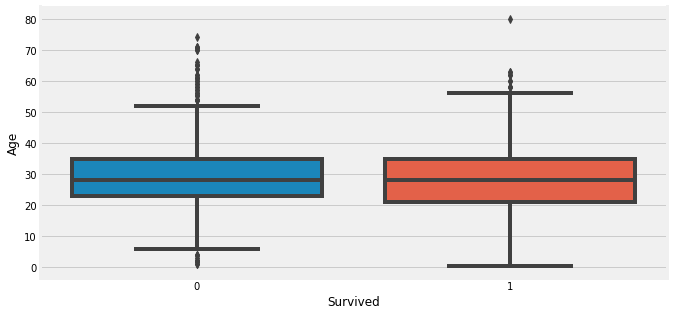

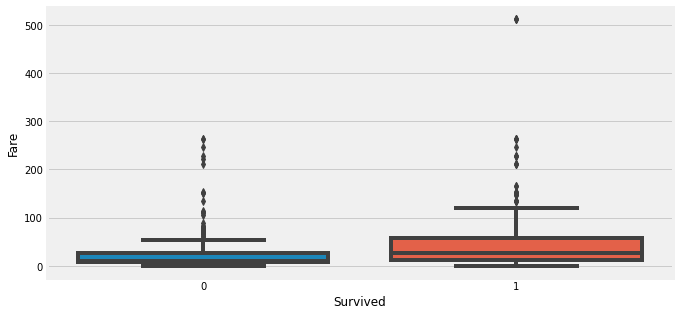

In [105]:
# create scatter plot to check sex, Pclass, fare and embarked relationship with survived
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=train2)

# mean of ages by Survived
print(train2.groupby('Survived').mean()[['Age']])

plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=train2)

# mean of ages by Survived
print(train2.groupby('Survived').mean()[['Fare']])

There are some outliers in our data 

In the age column the data point around 80 years seems like an outlier but its practical so we will not interfere with it


There are also cases where the fare was too high ... we will also leave those cases inplace since there are always occurences of luxury suits in sea voyage that cost  alot . So in our case we will assume that those are the fare charged for such

##Bivariate Analysis

In [16]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

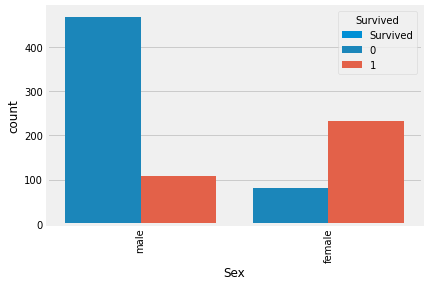

In [18]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=train,)
plt.show()

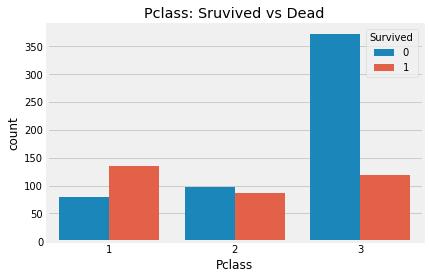

In [19]:
sns.countplot('Pclass', hue='Survived', data=train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

 It is clearly seen that pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survivail and non-survival rate is 49% and 51% approx. While in Class 1 almost 68% people survived. So money and status matters here

##Multivariate Analysis

In [20]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
pip install fastai2

In [22]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai2.tabular.all import *

In [24]:
dep_var = 'Survived'

In [27]:
cont,cat = cont_cat_split(train, 1, dep_var=dep_var)

In [28]:
procs = [Categorify, FillMissing]

In [29]:
train_tabular=TabularPandas(train, procs, cat, cont, y_names=dep_var)

In [30]:
train_tabular.show()

,Name,Sex,Ticket,Cabin,Embarked,Age_na,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,"Braund, Mr. Owen Harris",male,A/5 21171,#na#,S,False,1,3,22.0,1,0,7.250000,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C,False,2,1,38.0,1,0,71.283302,1
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,#na#,S,False,3,3,26.0,0,0,7.925000,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,False,4,1,35.0,1,0,53.099998,1
4,"Allen, Mr. William Henry",male,373450,#na#,S,False,5,3,35.0,0,0,8.050000,0
5,"Moran, Mr. James",male,330877,#na#,Q,True,6,3,28.0,0,0,8.458300,0
6,"McCarthy, Mr. Timothy J",male,17463,E46,S,False,7,1,54.0,0,0,51.862499,0
7,"Palsson, Master. Gosta Leonard",male,349909,#na#,S,False,8,3,2.0,3,1,21.075001,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,#na#,S,False,9,3,27.0,0,2,11.133300,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,#na#,C,False,10,2,14.0,1,0,30.070801,1


In [31]:
train_tabular.items.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
0,1,0,3,109,2,22.0,1,0,524,7.250000,0,3,1
1,2,1,1,191,1,38.0,1,0,597,71.283302,82,1,1
2,3,1,3,354,1,26.0,0,0,670,7.925000,0,3,1
3,4,1,1,273,1,35.0,1,0,50,53.099998,56,3,1
4,5,0,3,16,2,35.0,0,0,473,8.050000,0,3,1


###Correlation Matrix
Creating correlation matrix is also helpful to see the relationship between all variables to effectively choose features.
After determining which variables are mostly correlating with survival rate, creating plot is helpful visually to better understand the relationship.

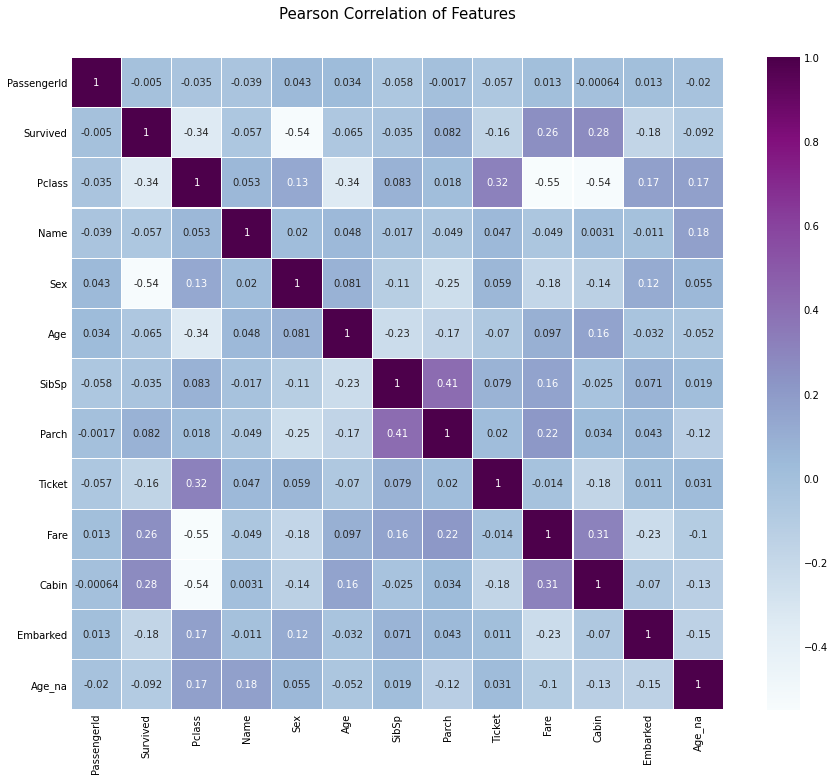

In [32]:
# correlation matrix
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_tabular.items.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap="BuPu", linecolor='white', annot=True)

Our correlation matrix plot  indicates the our features are quiet independent ...
The hghest seen is 0.51  


I believe cabin class and fare are strongly correlated so i am going to impute the predictive power score for each variable and see what I find out.

In [ ]:
pip install ppscore

In [34]:
import ppscore as pps

In [48]:
pps.matrix(train_tabular.items)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,PassengerId,PassengerId,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,PassengerId,Survived,0.000000,regression,True,mean absolute error,0.383838,0.465742,"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')"
2,PassengerId,Pclass,0.000000,regression,True,mean absolute error,0.691358,0.887812,"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')"
3,PassengerId,Name,0.000000,regression,True,mean absolute error,222.749719,300.379984,"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')"
4,PassengerId,Sex,0.000000,regression,True,mean absolute error,0.352413,0.491602,"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')"
...,...,...,...,...,...,...,...,...,...
164,Age_na,Ticket,0.000537,regression,True,mean absolute error,175.375982,175.281842,"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')"
165,Age_na,Fare,0.000000,regression,True,mean absolute error,23.509676,28.025465,"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')"
166,Age_na,Cabin,0.000000,regression,True,mean absolute error,17.629630,27.004686,"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')"
167,Age_na,Embarked,0.000000,regression,True,mean absolute error,0.470258,0.655412,"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')"


lets write it on a table that we can understand with ease 

In [99]:
mat=pps.matrix(train_tabular.items,sorted=True)

In [102]:
mat.iloc[0:13,0:3]

,x,y,ppscore
0,PassengerId,PassengerId,1.0
1,Survived,Survived,1.0
2,Pclass,Pclass,1.0
3,Name,Name,1.0
4,Sex,Sex,1.0
5,Age,Age,1.0
6,SibSp,SibSp,1.0
7,Parch,Parch,1.0
8,Ticket,Ticket,1.0
9,Fare,Fare,1.0


since the ppscore matrix returned a dataframe sorted in order of the score the first  12 rows have  a pp score of 1 since its the measure of how a class would predict  itself 


The rows after that explore how a variable predicts the other ..... the model for prediction that the pps score uses is a decision tree regressor and classifier for continous and catergorical variables respectively

lets see the scores 

In [104]:
mat.iloc[13:50,0:4]

,x,y,ppscore,case
13,Fare,Pclass,0.911874,regression
14,Ticket,Pclass,0.897674,regression
15,Age,Age_na,0.751643,regression
16,Ticket,Embarked,0.610953,regression
17,Fare,Embarked,0.599562,regression
18,Ticket,Fare,0.586720,regression
19,Fare,Ticket,0.552931,regression
20,Cabin,Pclass,0.409543,regression
21,Fare,SibSp,0.350391,regression
22,Ticket,Cabin,0.299588,regression


This gives us an intresting finding that was not in the correlation matrix 

There are columns that are related ... example is the fare and passanger class  the fare column can predict the passanger class by around 91% accuracy 

That is reasonable as most travels be it air or sea the classes have different prices 

We also notice that ticket and pclass and ticket and embarked are really not as independent as it may seem

# MODELING

We are going to deploy KNN  to try and classify this whether a passanger survived or not

In [106]:
train2.head()

,Survived,Sex,Embarked,Pclass,Age,SibSp,Parch,Ticket,Fare
0,0,2,3,3,22.0,1,0,524,7.250000
1,1,1,1,1,38.0,1,0,597,71.283302
2,1,1,3,3,26.0,0,0,670,7.925000
3,1,1,3,1,35.0,1,0,50,53.099998
4,0,2,3,3,35.0,0,0,473,8.050000


In [108]:
y=train2['Survived']
X=train2.drop('Survived',axis=1)

In [109]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int8

In [110]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [111]:
X.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Ticket,Fare
0,2,3,3,22.0,1,0,524,7.250000
1,1,1,1,38.0,1,0,597,71.283302
2,1,3,3,26.0,0,0,670,7.925000
3,1,3,1,35.0,1,0,50,53.099998
4,2,3,3,35.0,0,0,473,8.050000


In [116]:
#splitting our dataset into train and test 

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier


In [114]:
# Normalize Data
X = preprocessing.StandardScaler().fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [118]:
# try 3 different Ks to pick the best one to train the model
neigh5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
yhat5 = neigh5.predict(X_test)
cm5 = metrics.confusion_matrix(y_test, yhat5)
print('Test set Accuracy of K=5:', metrics.accuracy_score(y_test, yhat5))
print(cm5)

neigh17 = KNeighborsClassifier(n_neighbors=17).fit(X_train, y_train)
yhat17 = neigh17.predict(X_test)
cm17 = metrics.confusion_matrix(y_test, yhat17)
print('Test set Accuracy of K=17: ', metrics.accuracy_score(y_test, yhat17))
print(cm17)


neigh29 = KNeighborsClassifier(n_neighbors=29).fit(X_train, y_train)
yhat29 = neigh29.predict(X_test)
cm29 = metrics.confusion_matrix(y_test, yhat29)
print('Test set Accuracy of K=29 : ', metrics.accuracy_score(y_test, yhat29))
print(cm29)


neigh35 = KNeighborsClassifier(n_neighbors=35).fit(X_train, y_train)
yhat35 = neigh29.predict(X_test)
cm35 = metrics.confusion_matrix(y_test, yhat35)
print('Test set Accuracy of K=35 : ', metrics.accuracy_score(y_test, yhat35))
print(cm35)

Test set Accuracy of K=5: 0.8435754189944135
[[107  11]
 [ 17  44]]
Test set Accuracy of K=17:  0.8659217877094972
[[110   8]
 [ 16  45]]
Test set Accuracy of K=29 :  0.8715083798882681
[[109   9]
 [ 14  47]]
Test set Accuracy of K=35 :  0.8715083798882681
[[109   9]
 [ 14  47]]


As the value of K increases our model performance gets better 

from K=29 To K=35 the model performance is constant .. so we will tune the model to see how it performs and the  most ideal K for this particular problem

In [120]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yhat29)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[109   9]
 [ 14  47]]

True Positives(TP) =  109

True Negatives(TN) =  47

False Positives(FP) =  9

False Negatives(FN) =  14


The confusion matrix shows 109 + 47 = 156 correct predictions and 9 + 14 = 23 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 109

True Negatives (Actual Negative:0 and Predict Negative:0) - 47

False Positives (Actual Negative:0 but Predict Positive:1) - 9 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 14 (Type II error)

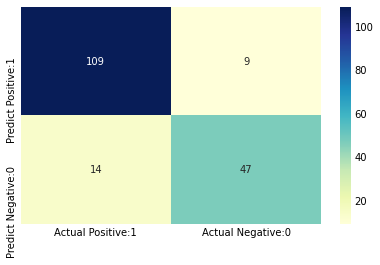

In [122]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [123]:
#classification report 

from sklearn.metrics import classification_report

print(classification_report(y_test, yhat29))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       118
           1       0.84      0.77      0.80        61

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179



In [124]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [125]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8715


In [126]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1285


In [127]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9237


###ROC AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [128]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, yhat29)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8471


ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether a passanger survived or not 

###k-fold Cross Validation

In [131]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(neigh29, X_train, y_train, cv = 50, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.86666667 1.         0.8        0.66666667 0.73333333 0.86666667
 0.93333333 0.86666667 0.86666667 0.8        0.6        0.66666667
 0.71428571 0.78571429 0.85714286 0.85714286 0.92857143 0.71428571
 0.85714286 0.78571429 0.78571429 0.85714286 0.5        0.78571429
 0.78571429 0.64285714 0.85714286 0.85714286 0.85714286 0.71428571
 0.92857143 0.71428571 0.71428571 0.57142857 0.92857143 0.85714286
 0.78571429 0.78571429 0.71428571 0.71428571 0.78571429 0.5
 0.85714286 0.71428571 0.85714286 0.85714286 0.85714286 0.71428571
 0.85714286 0.64285714]


In [132]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7833


Interpretation
Using the mean cross-validation, we can conclude that we expect the model to be around 78.33 % accurate on average.

If we look at all the 50 scores produced by the 50-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 50% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.

We can see that 50-fold cross-validation accuracy does not result in performance improvement for this model.

###challenging the solution 

it is well known that Ensemblemodels perform better than mot stand alone models so we will challenge our model using the random forest model